In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190226/'

In [3]:
dir_list = ['people30000']
seed_list = [str(123 + i) for i in range(1)]
csv_list = ['od']
area_list = [str(i) for i in range(81)]
area_one_length = 9

In [4]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(area_one_length)]))
    return df

In [5]:
create_base_dataframe()

,00,10,20,30,40,50,60,70,80


In [6]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[0])
        row = str(area_id // area_one_length)
        col = str(area_id % area_one_length) + '0'
        base.loc[row, col] = r[1]
        
    return base

In [7]:
def area_to_contour(area_id):
    area_id = int(area_id)
    left = str(area_id // area_one_length)
    right = str(area_id % area_one_length) + '0'
    return left+right

In [8]:
base = create_base_dataframe()

csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            for _area in area_list:
                df = pd.read_csv(root_dir + 'next_move_area_od/' + _dir + 'seed' + _seed + '_' + _csv + _area + '.csv',
                                                        encoding='Shift_JISx0213')
                df = convert_area_to_contour(base.copy(), df.copy())
#                 df = df / df.sum().sum()
                df = df.sort_index(ascending=False)
                df.fillna(0, inplace=True)
                
                _area = area_to_contour(_area)
                csv_array[_dir][_seed][_csv][_area] = df

In [18]:
def create_contour(df):
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=100, vmin=0)
    
    print(df.sum().sum())

In [10]:
people = 'people30000'
seed = '123'
csv = 'od'

In [46]:
df_area_sum = pd.DataFrame(columns=['area', 'sum'])
for area in [area_to_contour(i) for i in area_list]:
    df = pd.DataFrame([area, csv_array[people][seed][csv][area].sum().sum()], index=['area', 'sum']).T
    df_area_sum = pd.concat([df_area_sum, df])
df_area_sum.reset_index(drop=True, inplace=True)
df_area_sum = df_area_sum[df_area_sum['sum'] > 0]
df_area_sum = df_area_sum.sort_values(by=['sum'], ascending=False)
df_area_sum.head()

,area,sum
40,440,3662
69,760,3214
21,230,3078
79,870,2852
31,340,2819


# コンター図

In [37]:
area_order_top5 = list(df_area_sum['area'].iloc[0:5])

440
3662.0


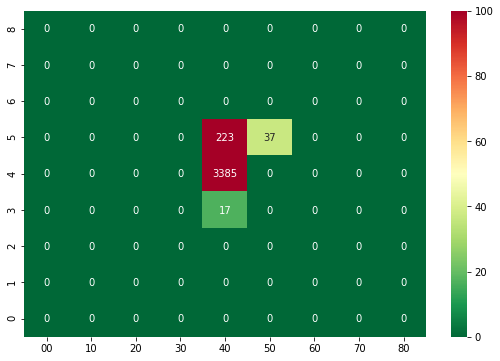

In [40]:
area = area_order_top5[0]
print(area)
create_contour(csv_array[people][seed][csv][area])

760
3214.0


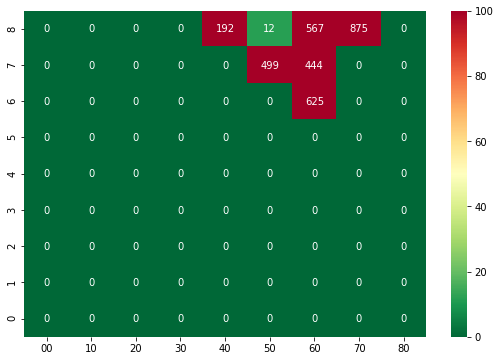

In [41]:
area = area_order_top5[1]
print(area)
create_contour(csv_array[people][seed][csv][area])

230
3078.0


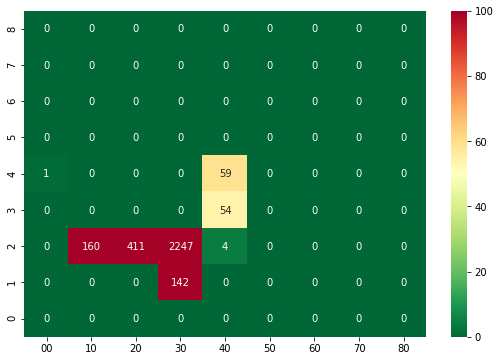

In [42]:
area = area_order_top5[2]
print(area)
create_contour(csv_array[people][seed][csv][area])

870
2852.0


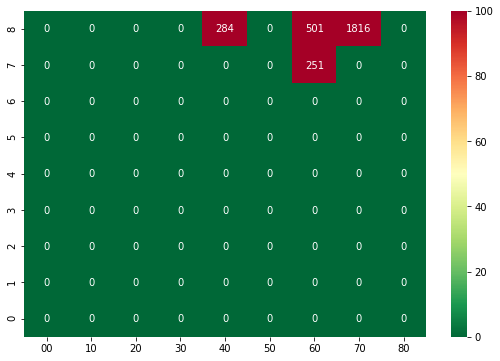

In [43]:
area = area_order_top5[3]
print(area)
create_contour(csv_array[people][seed][csv][area])

340
2819.0


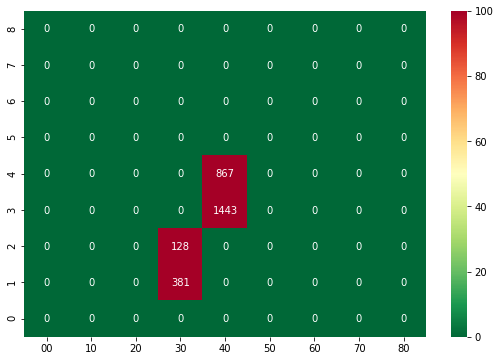

In [44]:
area = area_order_top5[4]
print(area)
create_contour(csv_array[people][seed][csv][area])